# Q1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder

In [62]:
X_train = pd.read_csv('/content/trainData.csv', header=None).values
y_train = pd.read_csv('/content/trainLabels.csv', header=None).values.flatten()
X_test = pd.read_csv('/content/testData.csv', header=None).values
y_test = pd.read_csv('/content/testLabels.csv', header=None).values.flatten()

X_train = X_train / 255.0
X_test = X_test / 255.0


encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))


Training with hidden_size = 16
Epoch 1, Cost: 2.3024979131527097, Train Accuracy: 17.48%, Test Accuracy: 16.92%
Epoch 2, Cost: 2.3024222911858256, Train Accuracy: 18.22%, Test Accuracy: 17.72%
Epoch 3, Cost: 2.302356356995434, Train Accuracy: 18.66%, Test Accuracy: 18.04%
Epoch 4, Cost: 2.302298635183845, Train Accuracy: 18.76%, Test Accuracy: 18.16%
Epoch 5, Cost: 2.302246966709212, Train Accuracy: 18.82%, Test Accuracy: 18.24%
Epoch 6, Cost: 2.302199885127516, Train Accuracy: 18.76%, Test Accuracy: 18.16%
Epoch 7, Cost: 2.302155787072429, Train Accuracy: 18.78%, Test Accuracy: 17.96%
Epoch 8, Cost: 2.3021146337716627, Train Accuracy: 18.62%, Test Accuracy: 17.68%
Epoch 9, Cost: 2.30207762141154, Train Accuracy: 18.58%, Test Accuracy: 17.60%
Epoch 10, Cost: 2.302044574570236, Train Accuracy: 18.30%, Test Accuracy: 17.36%

Training with hidden_size = 32
Epoch 1, Cost: 2.30269828431121, Train Accuracy: 9.04%, Test Accuracy: 10.96%
Epoch 2, Cost: 2.30265649428261, Train Accuracy: 9.44%,

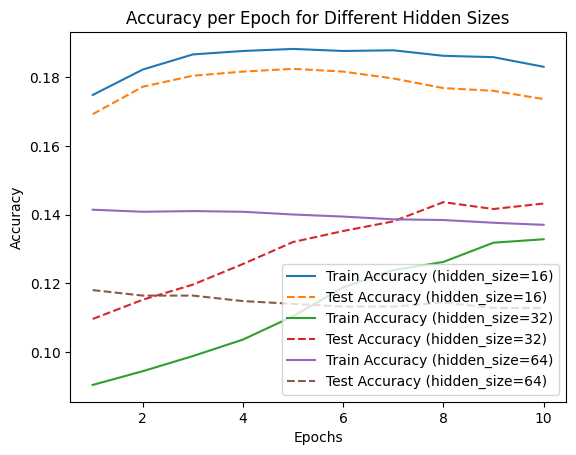

In [63]:
def relu_derivative(Z):
    return (Z > 0).astype(float)

def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(0, Z)


def softmax(Z):
    exp_values = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

def compute_cost(Y_true, Y_pred):
    m = Y_true.shape[0]
    cost = -np.sum(Y_true * np.log(Y_pred)) / m
    return cost

def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A2

def train(X_train, Y_train, X_test, Y_test, input_size, hidden_size, output_size, learning_rate, num_epochs):
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)
    train_accuracy = []
    test_accuracy = []

    for epoch in range(num_epochs):
        Z1 = np.dot(X_train, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = softmax(Z2)

        cost = compute_cost(Y_train, A2)

        dZ2 = A2 - Y_train
        dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        train_pred = predict(X_train, W1, b1, W2, b2)
        train_acc = np.mean(np.argmax(train_pred, axis=1) == np.argmax(Y_train, axis=1))
        train_accuracy.append(train_acc)

        test_pred = predict(X_test, W1, b1, W2, b2)
        test_acc = np.mean(np.argmax(test_pred, axis=1) == np.argmax(Y_test, axis=1))
        test_accuracy.append(test_acc)

        print(f'Epoch {epoch + 1}, Cost: {cost}, Train Accuracy: {train_acc * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%')

    return W1, b1, W2, b2, train_accuracy, test_accuracy

input_size = 196
hidden_sizes = [16, 32, 64]
output_size = 10
learning_rate = 0.005
num_epochs = 10

for hidden_size in hidden_sizes:
    print(f"\nTraining with hidden_size = {hidden_size}")
    W1, b1, W2, b2, train_acc, test_acc = train(X_train, y_train_onehot, X_test, y_test_onehot, input_size, hidden_size, output_size, learning_rate, num_epochs)

    plt.plot(range(1, num_epochs + 1), train_acc, label=f'Train Accuracy (hidden_size={hidden_size})')
    plt.plot(range(1, num_epochs + 1), test_acc, label=f'Test Accuracy (hidden_size={hidden_size})', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch for Different Hidden Sizes')
plt.legend()
plt.show()



Training with hidden_sizes = (16, 32)
Epoch 1, Cost: 2.3025921227746258, Train Accuracy: 9.06%, Test Accuracy: 11.88%
Epoch 2, Cost: 2.3025422095481374, Train Accuracy: 9.56%, Test Accuracy: 12.12%
Epoch 3, Cost: 2.3024943176964663, Train Accuracy: 9.96%, Test Accuracy: 12.80%
Epoch 4, Cost: 2.3024508506115766, Train Accuracy: 10.20%, Test Accuracy: 12.96%
Epoch 5, Cost: 2.3024115231490914, Train Accuracy: 10.62%, Test Accuracy: 13.28%
Epoch 6, Cost: 2.302376342845251, Train Accuracy: 10.96%, Test Accuracy: 13.36%
Epoch 7, Cost: 2.3023440323638202, Train Accuracy: 11.28%, Test Accuracy: 13.56%
Epoch 8, Cost: 2.3023151515642226, Train Accuracy: 11.68%, Test Accuracy: 13.88%
Epoch 9, Cost: 2.30228876644221, Train Accuracy: 12.02%, Test Accuracy: 14.12%
Epoch 10, Cost: 2.302263968849104, Train Accuracy: 12.40%, Test Accuracy: 14.40%

Training with hidden_sizes = (32, 64)
Epoch 1, Cost: 2.3028655979492045, Train Accuracy: 7.18%, Test Accuracy: 9.56%
Epoch 2, Cost: 2.302813329723381, Train

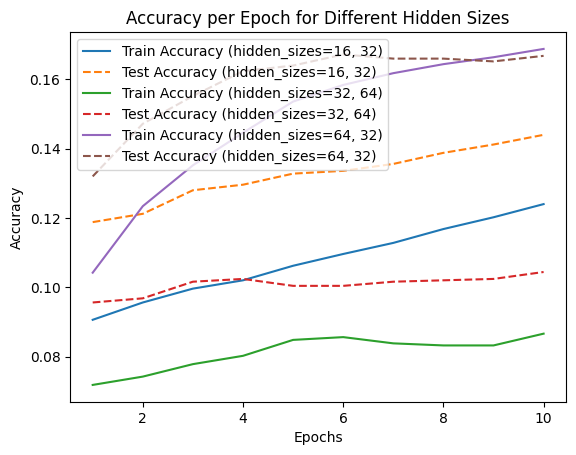

In [66]:
def relu_derivative(Z):
    return (Z > 0).astype(float)

def initialize_weights(input_size, hidden_size1, hidden_size2, output_size):
    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3

def relu(Z):
    return np.maximum(0, Z)


def softmax(Z):
    exp_values = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

def compute_cost(Y_true, Y_pred):
    m = Y_true.shape[0]
    cost = -np.sum(Y_true * np.log(Y_pred)) / m
    return cost

def predict(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return A3

def train(X_train, Y_train, X_test, Y_test, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs):
    W1, b1, W2, b2, W3, b3 = initialize_weights(input_size, hidden_size1, hidden_size2, output_size)
    train_accuracy = []
    test_accuracy = []

    for epoch in range(num_epochs):
        Z1 = np.dot(X_train, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = relu(Z2)
        Z3 = np.dot(A2, W3) + b3
        A3 = softmax(Z3)

        cost = compute_cost(Y_train, A3)

        dZ3 = A3 - Y_train
        dW3 = np.dot(A2.T, dZ3) / X_train.shape[0]
        db3 = np.sum(dZ3, axis=0, keepdims=True) / X_train.shape[0]

        dA2 = np.dot(dZ3, W3.T)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

        train_pred = predict(X_train, W1, b1, W2, b2, W3, b3)
        train_acc = np.mean(np.argmax(train_pred, axis=1) == np.argmax(Y_train, axis=1))
        train_accuracy.append(train_acc)

        test_pred = predict(X_test, W1, b1, W2, b2, W3, b3)
        test_acc = np.mean(np.argmax(test_pred, axis=1) == np.argmax(Y_test, axis=1))
        test_accuracy.append(test_acc)

        print(f'Epoch {epoch + 1}, Cost: {cost}, Train Accuracy: {train_acc * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%')

    return W1, b1, W2, b2, W3, b3, train_accuracy, test_accuracy

input_size = 196
hidden_sizes = [(16, 32), (32, 64), (64, 32)]
output_size = 10
learning_rate = 0.005
num_epochs = 10

for hidden_size1, hidden_size2 in hidden_sizes:
    print(f"\nTraining with hidden_sizes = ({hidden_size1}, {hidden_size2})")
    W1, b1, W2, b2, W3, b3, train_acc, test_acc = train(X_train, y_train_one_hot, X_test, y_test_one_hot, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs)

    plt.plot(range(1, num_epochs + 1), train_acc, label=f'Train Accuracy (hidden_sizes={hidden_size1}, {hidden_size2})')
    plt.plot(range(1, num_epochs + 1), test_acc, label=f'Test Accuracy (hidden_sizes={hidden_size1}, {hidden_size2})', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch for Different Hidden Sizes')
plt.legend()
plt.show()



Training with hidden_sizes = (32, 64)
Epoch 1, Cost: 2.3025949397713092, Train Accuracy: 6.24%, Test Accuracy: 6.16%
Epoch 2, Cost: 2.3025240860713274, Train Accuracy: 6.78%, Test Accuracy: 6.76%
Epoch 3, Cost: 2.3024528973237794, Train Accuracy: 7.80%, Test Accuracy: 7.64%
Epoch 4, Cost: 2.3023843760332117, Train Accuracy: 8.44%, Test Accuracy: 8.20%
Epoch 5, Cost: 2.3023186510370057, Train Accuracy: 9.48%, Test Accuracy: 9.36%
Epoch 6, Cost: 2.302256602129058, Train Accuracy: 10.70%, Test Accuracy: 10.36%
Epoch 7, Cost: 2.302197640222851, Train Accuracy: 13.00%, Test Accuracy: 12.24%
Epoch 8, Cost: 2.3021415816657136, Train Accuracy: 14.66%, Test Accuracy: 14.56%
Epoch 9, Cost: 2.3020892231001735, Train Accuracy: 16.18%, Test Accuracy: 16.24%
Epoch 10, Cost: 2.302040110959247, Train Accuracy: 17.02%, Test Accuracy: 17.52%

Training with hidden_sizes = (64, 32)
Epoch 1, Cost: 2.3025491281635175, Train Accuracy: 11.34%, Test Accuracy: 14.08%
Epoch 2, Cost: 2.302497992162106, Train Acc

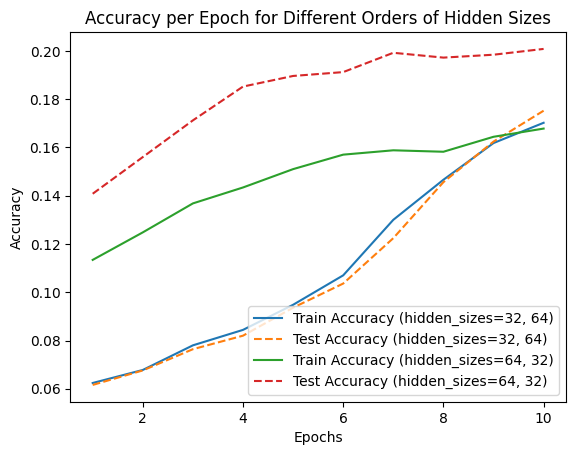

In [67]:
def relu_derivative(Z):
    return (Z > 0).astype(float)

def initialize_weights(input_size, hidden_size1, hidden_size2, output_size):
    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2. / hidden_size2)
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_values = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

def compute_cost(Y_true, Y_pred):
    m = Y_true.shape[0]
    cost = -np.sum(Y_true * np.log(Y_pred)) / m
    return cost

def predict(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return A3

def train(X_train, Y_train, X_test, Y_test, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs):
    W1, b1, W2, b2, W3, b3 = initialize_weights(input_size, hidden_size1, hidden_size2, output_size)
    train_accuracy = []
    test_accuracy = []

    for epoch in range(num_epochs):
        Z1 = np.dot(X_train, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = relu(Z2)
        Z3 = np.dot(A2, W3) + b3
        A3 = softmax(Z3)

        cost = compute_cost(Y_train, A3)

        dZ3 = A3 - Y_train
        dW3 = np.dot(A2.T, dZ3) / X_train.shape[0]
        db3 = np.sum(dZ3, axis=0, keepdims=True) / X_train.shape[0]

        dA2 = np.dot(dZ3, W3.T)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

        train_pred = predict(X_train, W1, b1, W2, b2, W3, b3)
        train_acc = np.mean(np.argmax(train_pred, axis=1) == np.argmax(Y_train, axis=1))
        train_accuracy.append(train_acc)

        test_pred = predict(X_test, W1, b1, W2, b2, W3, b3)
        test_acc = np.mean(np.argmax(test_pred, axis=1) == np.argmax(Y_test, axis=1))
        test_accuracy.append(test_acc)

        print(f'Epoch {epoch + 1}, Cost: {cost}, Train Accuracy: {train_acc * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%')

    return W1, b1, W2, b2, W3, b3, train_accuracy, test_accuracy

input_size = 196
hidden_size_pairs = [(32, 64), (64, 32)]
output_size = 10
learning_rate = 0.005
num_epochs = 10

for hidden_size1, hidden_size2 in hidden_size_pairs:
    print(f"\nTraining with hidden_sizes = ({hidden_size1}, {hidden_size2})")
    W1, b1, W2, b2, W3, b3, train_acc, test_acc = train(X_train, y_train_one_hot, X_test, y_test_one_hot, input_size, hidden_size1, hidden_size2, output_size, learning_rate, num_epochs)

    plt.plot(range(1, num_epochs + 1), train_acc, label=f'Train Accuracy (hidden_sizes={hidden_size1}, {hidden_size2})')
    plt.plot(range(1, num_epochs + 1), test_acc, label=f'Test Accuracy (hidden_sizes={hidden_size1}, {hidden_size2})', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch for Different Orders of Hidden Sizes')
plt.legend()
plt.show()



Training with hidden_sizes = (16, 16, 16)
Epoch 1, Cost: 2.3026643988265625, Train Accuracy: 10.22%, Test Accuracy: 9.80%
Epoch 2, Cost: 2.3025619822805323, Train Accuracy: 11.98%, Test Accuracy: 12.20%
Epoch 3, Cost: 2.3024938444385317, Train Accuracy: 15.38%, Test Accuracy: 13.96%
Epoch 4, Cost: 2.3024448245889846, Train Accuracy: 15.74%, Test Accuracy: 14.64%
Epoch 5, Cost: 2.302399667402007, Train Accuracy: 14.06%, Test Accuracy: 13.72%
Epoch 6, Cost: 2.302351591977748, Train Accuracy: 12.90%, Test Accuracy: 12.72%
Epoch 7, Cost: 2.3022958182294837, Train Accuracy: 11.86%, Test Accuracy: 12.16%
Epoch 8, Cost: 2.3022296676743466, Train Accuracy: 11.62%, Test Accuracy: 11.84%
Epoch 9, Cost: 2.3021588397966743, Train Accuracy: 11.48%, Test Accuracy: 11.68%
Epoch 10, Cost: 2.3020666937083862, Train Accuracy: 11.44%, Test Accuracy: 11.60%

Training with hidden_sizes = (32, 32, 32)
Epoch 1, Cost: 2.3024276142621973, Train Accuracy: 7.72%, Test Accuracy: 8.92%
Epoch 2, Cost: 2.3023583378

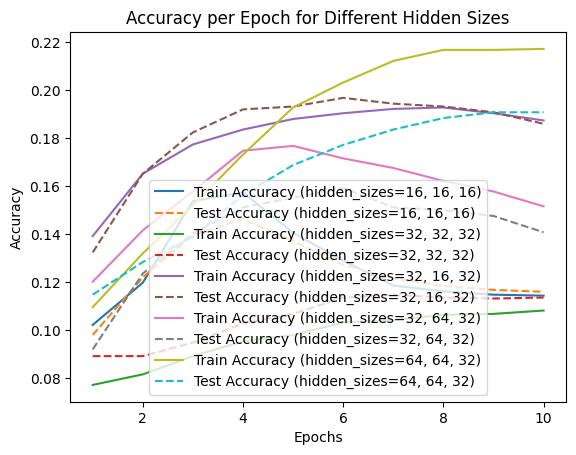

In [69]:
def relu_derivative(Z):
    return (Z > 0).astype(float)

def initialize_weights(input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, hidden_size3) * np.sqrt(2. / hidden_size2)
    b3 = np.zeros((1, hidden_size3))
    W4 = np.random.randn(hidden_size3, output_size) * np.sqrt(2. / hidden_size3)
    b4 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3, W4, b4

def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_values = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

def compute_cost(Y_true, Y_pred):
    m = Y_true.shape[0]
    cost = -np.sum(Y_true * np.log(Y_pred)) / m
    return cost

def predict(X, W1, b1, W2, b2, W3, b3, W4, b4):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = relu(Z3)
    Z4 = np.dot(A3, W4) + b4
    A4 = softmax(Z4)
    return A4

def train(X_train, Y_train, X_test, Y_test, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, learning_rate, num_epochs):
    W1, b1, W2, b2, W3, b3, W4, b4 = initialize_weights(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
    train_accuracy = []
    test_accuracy = []

    for epoch in range(num_epochs):
        Z1 = np.dot(X_train, W1) + b1
        A1 = relu(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = relu(Z2)
        Z3 = np.dot(A2, W3) + b3
        A3 = relu(Z3)
        Z4 = np.dot(A3, W4) + b4
        A4 = softmax(Z4)

        cost = compute_cost(Y_train, A4)

        dZ4 = A4 - Y_train
        dW4 = np.dot(A3.T, dZ4) / X_train.shape[0]
        db4 = np.sum(dZ4, axis=0, keepdims=True) / X_train.shape[0]

        dA3 = np.dot(dZ4, W4.T)
        dZ3 = dA3 * relu_derivative(Z3)
        dW3 = np.dot(A2.T, dZ3) / X_train.shape[0]
        db3 = np.sum(dZ3, axis=0, keepdims=True) / X_train.shape[0]

        dA2 = np.dot(dZ3, W3.T)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3
        W4 -= learning_rate * dW4
        b4 -= learning_rate * db4

        train_pred = predict(X_train, W1, b1, W2, b2, W3, b3, W4, b4)
        train_acc = np.mean(np.argmax(train_pred, axis=1) == np.argmax(Y_train, axis=1))
        train_accuracy.append(train_acc)

        test_pred = predict(X_test, W1, b1, W2, b2, W3, b3, W4, b4)
        test_acc = np.mean(np.argmax(test_pred, axis=1) == np.argmax(Y_test, axis=1))
        test_accuracy.append(test_acc)

        print(f'Epoch {epoch + 1}, Cost: {cost}, Train Accuracy: {train_acc * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%')

    return W1, b1, W2, b2, W3, b3, W4, b4, train_accuracy, test_accuracy

input_size = 196
hidden_size_triples = [(16, 16, 16), (32, 32, 32), (32, 16, 32), (32, 64, 32), (64, 64, 32)]
output_size = 10
learning_rate = 0.005
num_epochs = 10

for hidden_size1, hidden_size2, hidden_size3 in hidden_size_triples:
    print(f"\nTraining with hidden_sizes = ({hidden_size1}, {hidden_size2}, {hidden_size3})")
    W1, b1, W2, b2, W3, b3, W4, b4, train_acc, test_acc = train(X_train, y_train_one_hot, X_test, y_test_one_hot, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, learning_rate, num_epochs)

    plt.plot(range(1, num_epochs + 1), train_acc, label=f'Train Accuracy (hidden_sizes={hidden_size1}, {hidden_size2}, {hidden_size3})')
    plt.plot(range(1, num_epochs + 1), test_acc, label=f'Test Accuracy (hidden_sizes={hidden_size1}, {hidden_size2}, {hidden_size3})', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch for Different Hidden Sizes')
plt.legend()
plt.show()



Training with hidden_sizes = (16, 16, 16)
Epoch 1, Cost: 2.302585094229575, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 2, Cost: 2.30258202013518, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 3, Cost: 2.302578949117349, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 4, Cost: 2.3025758811729653, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 5, Cost: 2.3025728162989147, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 6, Cost: 2.302569754492085, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 7, Cost: 2.302566695749368, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 8, Cost: 2.3025636400676603, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 9, Cost: 2.302560587443859, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 10, Cost: 2.302557537874866, Train Accuracy: 11.28%, Test Accuracy: 11.48%

Training with hidden_sizes = (32, 32, 32)
Epoch 1, Cost: 2.302585092731079, Train Accuracy: 11.28%, Test Accuracy: 11.48%
Epoch 2, Cost: 2.30258201258011

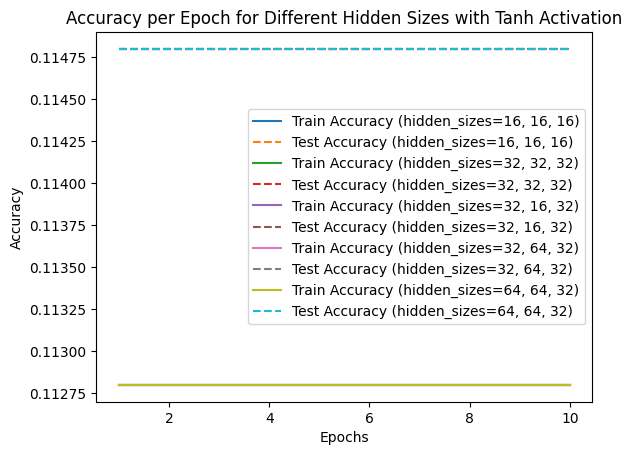

In [70]:
def initialize_weights(input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
    W1 = np.random.randn(input_size, hidden_size1) * 0.01
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * 0.01
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, hidden_size3) * 0.01
    b3 = np.zeros((1, hidden_size3))
    W4 = np.random.randn(hidden_size3, output_size) * 0.01
    b4 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3, W4, b4

def tanh(Z):
    return np.tanh(Z)

def tanh_derivative(Z):
    return 1 - np.tanh(Z)**2

def softmax(Z):
    exp_values = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

def compute_cost(Y_true, Y_pred):
    m = Y_true.shape[0]
    cost = -np.sum(Y_true * np.log(Y_pred)) / m
    return cost

def predict(X, W1, b1, W2, b2, W3, b3, W4, b4):
    Z1 = np.dot(X, W1) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = tanh(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = tanh(Z3)
    Z4 = np.dot(A3, W4) + b4
    A4 = softmax(Z4)
    return A4

def train(X_train, Y_train, X_test, Y_test, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, learning_rate, num_epochs):
    W1, b1, W2, b2, W3, b3, W4, b4 = initialize_weights(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
    train_accuracy = []
    test_accuracy = []

    for epoch in range(num_epochs):
        Z1 = np.dot(X_train, W1) + b1
        A1 = tanh(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = tanh(Z2)
        Z3 = np.dot(A2, W3) + b3
        A3 = tanh(Z3)
        Z4 = np.dot(A3, W4) + b4
        A4 = softmax(Z4)

        cost = compute_cost(Y_train, A4)

        dZ4 = A4 - Y_train
        dW4 = np.dot(A3.T, dZ4) / X_train.shape[0]
        db4 = np.sum(dZ4, axis=0, keepdims=True) / X_train.shape[0]

        dA3 = np.dot(dZ4, W4.T)
        dZ3 = dA3 * tanh_derivative(Z3)
        dW3 = np.dot(A2.T, dZ3) / X_train.shape[0]
        db3 = np.sum(dZ3, axis=0, keepdims=True) / X_train.shape[0]

        dA2 = np.dot(dZ3, W3.T)
        dZ2 = dA2 * tanh_derivative(Z2)
        dW2 = np.dot(A1.T, dZ2) / X_train.shape[0]
        db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train.shape[0]

        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * tanh_derivative(Z1)
        dW1 = np.dot(X_train.T, dZ1) / X_train.shape[0]
        db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train.shape[0]

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3
        W4 -= learning_rate * dW4
        b4 -= learning_rate * db4

        train_pred = predict(X_train, W1, b1, W2, b2, W3, b3, W4, b4)
        train_acc = np.mean(np.argmax(train_pred, axis=1) == np.argmax(Y_train, axis=1))
        train_accuracy.append(train_acc)

        test_pred = predict(X_test, W1, b1, W2, b2, W3, b3, W4, b4)
        test_acc = np.mean(np.argmax(test_pred, axis=1) == np.argmax(Y_test, axis=1))
        test_accuracy.append(test_acc)

        print(f'Epoch {epoch + 1}, Cost: {cost}, Train Accuracy: {train_acc * 100:.2f}%, Test Accuracy: {test_acc * 100:.2f}%')

    return W1, b1, W2, b2, W3, b3, W4, b4, train_accuracy, test_accuracy

input_size = 196
hidden_size_triples = [(16, 16, 16), (32, 32, 32), (32, 16, 32), (32, 64, 32), (64, 64, 32)]
output_size = 10
learning_rate = 0.005
num_epochs = 10

for hidden_size1, hidden_size2, hidden_size3 in hidden_size_triples:
    print(f"\nTraining with hidden_sizes = ({hidden_size1}, {hidden_size2}, {hidden_size3})")
    W1, b1, W2, b2, W3, b3, W4, b4, train_acc, test_acc = train(X_train, y_train_one_hot, X_test, y_test_one_hot, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, learning_rate, num_epochs)

    plt.plot(range(1, num_epochs + 1), train_acc, label=f'Train Accuracy (hidden_sizes={hidden_size1}, {hidden_size2}, {hidden_size3})')
    plt.plot(range(1, num_epochs + 1), test_acc, label=f'Test Accuracy (hidden_sizes={hidden_size1}, {hidden_size2}, {hidden_size3})', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch for Different Hidden Sizes with Tanh Activation')
plt.legend()
plt.show()


# Q2

Epoch 1/20, Train Loss: 0.0071, Validation Loss: 0.4006, Validation Accuracy: 0.8166
Epoch 2/20, Train Loss: 0.0062, Validation Loss: 0.3966, Validation Accuracy: 0.8195
Epoch 3/20, Train Loss: 0.0058, Validation Loss: 0.3600, Validation Accuracy: 0.8372
Epoch 4/20, Train Loss: 0.0055, Validation Loss: 0.3479, Validation Accuracy: 0.8400
Epoch 5/20, Train Loss: 0.0054, Validation Loss: 0.3433, Validation Accuracy: 0.8425
Epoch 6/20, Train Loss: 0.0053, Validation Loss: 0.3414, Validation Accuracy: 0.8425
Epoch 7/20, Train Loss: 0.0053, Validation Loss: 0.3399, Validation Accuracy: 0.8437
Epoch 8/20, Train Loss: 0.0052, Validation Loss: 0.3395, Validation Accuracy: 0.8448
Epoch 9/20, Train Loss: 0.0052, Validation Loss: 0.3399, Validation Accuracy: 0.8440
Epoch 10/20, Train Loss: 0.0052, Validation Loss: 0.3531, Validation Accuracy: 0.8367
Epoch 11/20, Train Loss: 0.0052, Validation Loss: 0.3440, Validation Accuracy: 0.8326
Epoch 12/20, Train Loss: 0.0052, Validation Loss: 0.3350, Valid

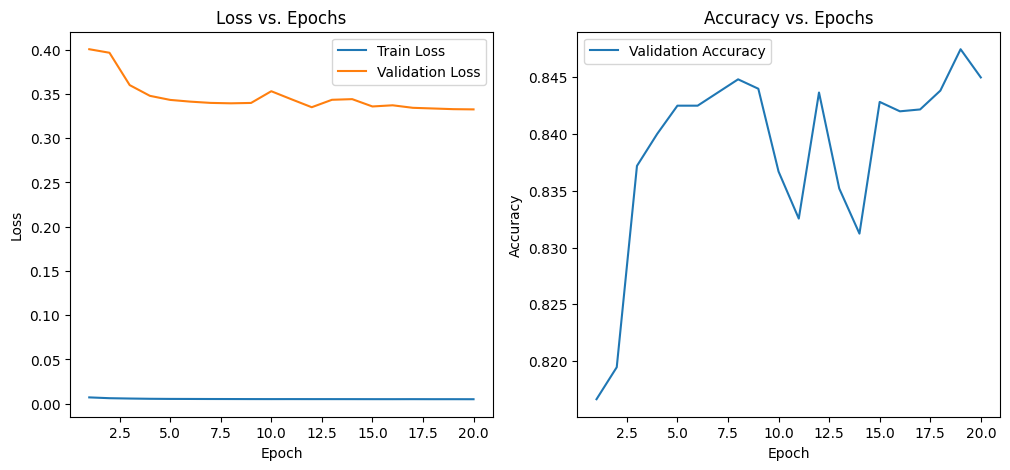


Test Accuracy: 0.843858776727996
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      4478
         1.0       0.73      0.62      0.67      1555

    accuracy                           0.84      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033

Confusion Matrix:
 [[4125  353]
 [ 589  966]]


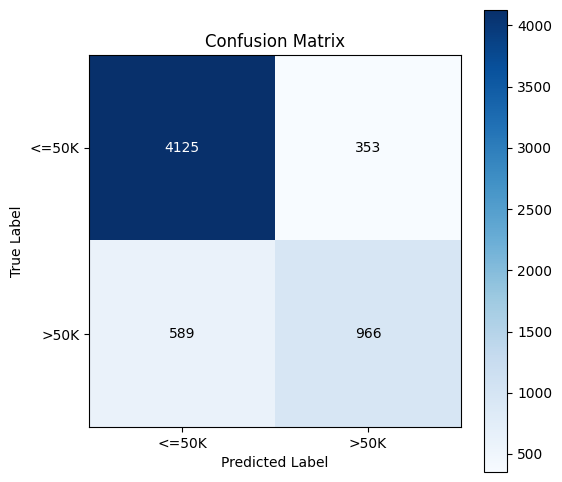

In [45]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship",
    "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
data = pd.read_csv(url, header=None, names=columns, na_values=" ?")

data.dropna(inplace=True)

numeric_features = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
categorical_features = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data["income"] = data["income"].apply(lambda x: 1 if x.strip() == ">50K" else 0)

scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

X = data.drop("income", axis=1).values
y = data["income"].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

class MLPModel(nn.Module):
    def __init__(self, input_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

input_size = X_train.shape[1]
model = MLPModel(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
batch_size = 64
best_val_loss = float('inf')
best_model = None
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train.size()[0])
    epoch_loss = 0
    for i in range(0, X_train.size()[0], batch_size):
        indices = permutation[i:i+batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]

        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(X_train))

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val).squeeze()
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

        val_preds = (val_outputs >= 0.5).float()
        val_acc = accuracy_score(y_val.numpy(), val_preds.numpy())
        val_accuracies.append(val_acc)

        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model = model.state_dict()

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss / len(X_train):.4f}, Validation Loss: {val_loss.item():.4f}, Validation Accuracy: {val_acc:.4f}")

model.load_state_dict(best_model)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test).squeeze()
    test_preds = (test_outputs >= 0.5).float()
    test_acc = accuracy_score(y_test.numpy(), test_preds.numpy())
    print("\nTest Accuracy:", test_acc)
    print("Classification Report:\n", classification_report(y_test.numpy(), test_preds.numpy()))

    cm = confusion_matrix(y_test.numpy(), test_preds.numpy())
    print("Confusion Matrix:\n", cm)

    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['<=50K', '>50K'])
    plt.yticks([0, 1], ['<=50K', '>50K'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.show()


In [61]:
model

MLPModel(
  (fc1): Linear(in_features=14, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)